In [5]:
# Import libraries and dependencies
import os 
import numpy as np
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [6]:
# Load .env environment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API")
alpaca_secret_key = os.getenv("ALPACA_SECRET")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [7]:
                                                                       # 1 year data fetch
# Set SnP 500 ticker
tickers = ["SPY"]

# Set start and end dates
start_date = pd.Timestamp("2020-03-06", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-03-05", tz="America/New_York").isoformat()

# Set timeframe to 1D
timeframe = "1D"

# Fetch price data
ticker_data = api.get_barset(
    tickers, 
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Preview df
ticker_data.head()

SPY                                   
                             open    high     low   close     volume
time                                                                
2020-03-06 00:00:00-05:00  293.15  298.78  290.23  297.42  198657535
2020-03-09 00:00:00-04:00  275.30  284.19  273.45  274.40  277300725
2020-03-10 00:00:00-04:00  284.64  288.52  273.50  288.44  246644123
2020-03-11 00:00:00-04:00  280.70  281.94  270.88  274.36  231055382
2020-03-12 00:00:00-04:00  256.00  266.66  247.68  248.10  346670590

In [8]:
                                # Run MC simulation
# set sim amount
num_sims = 500 

# forcast one year daily returns for SPY ETF
MC_SPY = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252
)

# Run 1 year sim
MC_SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010150,1.010681,0.994808,0.994572,0.963427,1.015441,1.005468,0.980046,1.062881,0.994187,...,1.010929,0.987823,0.994252,1.000761,1.009451,1.025355,0.973694,1.024526,1.015422,1.012827
2,1.008982,1.003853,0.946555,0.998158,0.998128,1.000802,1.029227,0.990212,1.083758,0.995476,...,1.015782,1.006853,0.989418,0.995950,1.014106,1.008108,0.981023,1.036416,0.991363,0.992500
3,1.025222,1.019580,0.990285,0.969355,1.002806,1.010836,1.059393,1.007712,1.030495,0.987849,...,1.013233,1.007185,0.977448,0.990036,1.024392,1.011653,0.955156,1.051298,0.992722,0.987481
4,1.028463,1.031791,0.967448,1.001894,0.994777,1.017226,1.084560,1.023309,1.037241,0.985536,...,1.013941,1.010543,1.001657,0.971412,1.033894,1.010326,0.938020,1.052997,0.975242,0.973931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2.104148,0.663138,1.526767,1.281384,1.490757,1.126649,1.534426,2.643536,0.705256,1.597651,...,1.162207,0.931400,1.209481,0.678717,1.563564,1.351290,1.115360,1.829877,2.018214,1.953398
249,2.109591,0.695320,1.512409,1.264027,1.530251,1.131574,1.523033,2.768645,0.696773,1.598434,...,1.207919,0.906506,1.221994,0.667185,1.552058,1.311270,1.146627,1.784291,1.985478,1.927233
250,2.206597,0.694522,1.519789,1.240521,1.559624,1.152458,1.522648,2.698961,0.725856,1.604576,...,1.241154,0.847570,1.178900,0.664506,1.577855,1.340707,1.162168,1.793765,1.967145,1.906300
251,2.081967,0.669931,1.550150,1.208174,1.585476,1.148160,1.540843,2.643351,0.715407,1.660944,...,1.177438,0.857513,1.096631,0.630062,1.599382,1.366588,1.143481,1.753279,1.952305,1.853327


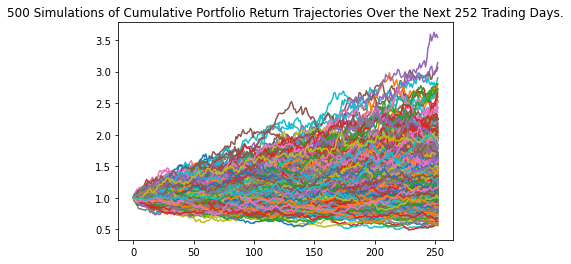

In [9]:
# display outcomes on line plot
line_plot = MC_SPY.plot_simulation()

In [10]:
# Calc sim sum stats
sim_return = {
    "mean": list(MC_SPY.simulated_return.mean(axis=1)),
    "median": list(MC_SPY.simulated_return.median(axis=1)),
    "min": list(MC_SPY.simulated_return.min(axis=1)),
    "max": list(MC_SPY.simulated_return.max(axis=1))
}

# Create sum stat df
sim_return_df = pd.DataFrame(sim_return)

# Display sample data
sim_return_df.tail()

,mean,median,min,max
248,1.352980,1.254651,0.547357,3.549085
249,1.354293,1.266495,0.554056,3.623552
250,1.356966,1.274846,0.566385,3.542615
251,1.358642,1.283669,0.563766,3.589692
252,1.362215,1.284849,0.559409,3.541634


<AxesSubplot:title={'center':'Projected 1 Year Daily Returns of S&P 500 Index'}>

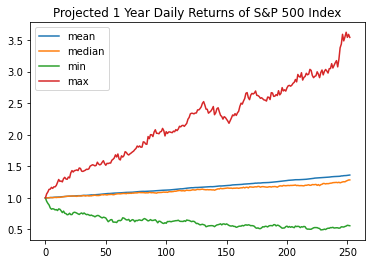

In [11]:
# display df visual
sim_return_df.plot(title="Projected 1 Year Daily Returns of S&P 500 Index")

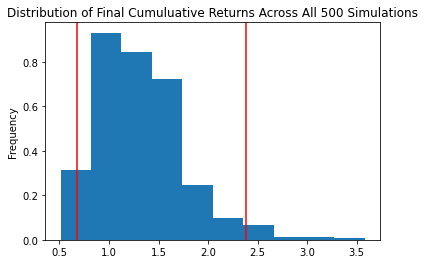

In [19]:
# Plot probability distribution and confidence intervals
dist_plot = MC_SPY.plot_distribution()

In [12]:
# Sim returns of investing $5k 
initial_investment = 5000

# Calculate progression of profits and losses
cumulative_pl = initial_investment * sim_return_df

# Display sample data
cumulative_pl.head()

,mean,median,min,max
0,5000.000000,5000.000000,5000.000000,5000.000000
1,5003.604774,5001.030359,4736.739853,5314.404744
2,5009.951142,5005.299533,4571.054895,5466.948945
3,5016.994777,5006.248488,4444.628095,5677.702065
4,5025.308300,5033.646393,4208.158321,5693.191621


<AxesSubplot:title={'center':'1 Year Sim Profits and Losses of S&P 500'}>

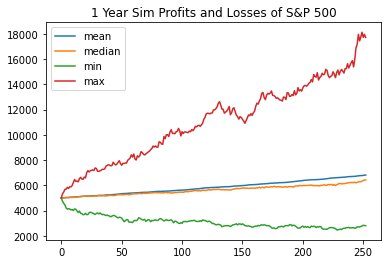

In [13]:
# Plot chart of sim P/L
cumulative_pl.plot(title="1 Year Sim Profits and Losses of S&P 500")

In [15]:
# Calculate range of possible outcomes for $5k investment

# Call summary statistics from sim
table = MC_SPY.summarize_cumulative_return()

# Print stats
print(table)

count           500.000000
mean              1.362215
std               0.480026
min               0.559409
25%               1.009750
50%               1.284849
75%               1.599892
max               3.541634
95% CI Lower      0.668810
95% CI Upper      2.565769
Name: 252, dtype: float64


In [16]:
# Use confidence intervals to calculate the range of possible outcomes for investment
ci_lower = round(table[8]*5000,2)
ci_upper = round(table[9]*5000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $5000 in the SPY ETF over the next  year will end within the range of ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $5000 in the SPY ETF over the next  year will end within the range of $3344.05 and $12828.84.
